# Project 2 Classification of Rainfall Event in Australia

Anggota:
1. Muhammad Taufiqul Hakim
2. M. Dwi Pratama
3. Rossanda Sevia Gadis
4. Shafira Almaisa

# Perkenalan

## Latar Belakang

>Kasus yang diangkat pada project ini adalah cuaca di Australia. Kondisi cuaca sangat mempengaruhi aktivitas masyarakat sehari-hari. Sering kali cuaca mengalami perubahan yang tidak menentu seperti hari ini cerah namun keesokan harinya turun hujan, yang mana hal tersebut dapat mengganggu bahkan menghentikan aktivitas yang sedang dilakukan. Oleh karena itu, dibangun sebuah model untuk memprediksi cuaca di hari esok, lebih tepatnya memprediksi apakah besok hujan atau tidak. Pembangunan model ini akan melibatkan beberapa variabel yang dianggap dapat mempengaruhi perhitungan hari esok hujan atau tidak. Model ini diharapkan dapat membantu masyarakat Australia agar dapat memperkirakan hujan sehingga akan lebih membantu mereka dalam mempersiapkan diri.

## Data

>Data yang digunakan adalah 'Rain in Australia' dimana data ini diambil dari website open source Kaggle. Data ini memuat sebanyak 23 kolom dan 145460 baris data. Kolom label atau target variabel dari data ini adalah kolom 'RainTomorrow' dimana kolom dengan value diskrit ini memuat value yes or no yang berarti jika yes maka besok akan turun hujan dengan curah hujan 1mm atau lebih dan sebaliknya. Sedangkan kolom lainnya merupakan kolom yang berisikan data-data yang berkenaan dengan cuaca seperti temperatur, evaporasi dan lainnya dimana kolom-kolom tersebut berisikan nilai numerik dan ada pula yang kategorik.

## Capaian

>Menggunakan data ini, akan dibangun sebuah model klasifikasi dimana digunakan data feature dan data label(target variabel) untuk melatih model agar mampu membuat prediksi hari esok hujan atau tidak menggunakan 6 algoritma klasifikasi yaitu logistic regression, KNN, SVM, Decision Tree, Random Forest dan Naive Bayes. 

# Import Pustaka

In [1]:
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

Kode di atas digunakan nantinya untuk proses pembacaan file yang berasal dari google drive.
Anda dapat mematikannya jika membuka dokumen dengan Jupyter Notebook dengan mengubah format cell menjadi raw

In [2]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

# building model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

# Hypothesis Testing
import statsmodels.api as sm

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

Dilakukan import library dimana akan diakses beberapa fungsi di dalamnya yang akan digunakan untuk keperluan membangun model klasifikasi ini.

# Data Loading

In [3]:
#url = 'https://drive.google.com/file/d/12y3XyFRfoy5Soq-QTw7XRV-pdcejnXBN/view?usp=share_link'
#id = url.split("/")[-2]

#downloaded = drive.CreateFile({'id':id})
#downloaded.GetContentFile('weatherAUS.csv')

Perintah untuk donwload Konten dari Url dengan nama file tersebut.
Jika membuka menggunakan Jupyter Notebook anda dapat mematikannya dengan mengubah cell menjadi format raw

In [4]:
# read data
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Dilakukan read file csv yang mana memuat dataset berisikan data hujan harian selama 10 tahun di Australia. Kemudian ditampilkan data teratas untuk melihat gambaran data secara umum.

In [5]:
# shape of the dataset
df.shape

(145460, 23)

Fungsi `shape()` digunakan untuk melihat dimensi atau bentuk data. Dari output dapat diketahui ada 145460 baris data dan 23 kolom pada dataset tersebut.

In [6]:
# check null values
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Dilakukan pengecekan nilai null menggunakan fungsi `isna()` dimana nilai null tersebut dihitung jumlahnya menggunakan fungsi `sum()` dan diberikan output berupa total null values dari masing-masing kolom.

In [7]:
# show information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dilihat informasi dari dataset menggunakan fungsi `info()` dimana akan diberikan output berupa daftar nama kolom, informasi jumlah data non-null di masing-masing kolom serta tipe data dari masing-masing kolom.

# Data Cleaning

In [8]:
# Mengecek korelasi antar kolom
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


Menggunakan fungsi `corr()`, dilihat korelasi antara kolom dengan kata lain melihat apakah terdapat kolom yang saling terkait penurunan atau kenaikan valuenya. Menggunakan fungsi ini juga dapat diperiksa apakah terdapat kolom dengan data yang sama atau tidak, jika ada salah satunya dapat dihapus.

In [9]:
# assign kolom yang akan digunakan
df = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainTomorrow']]
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,No
1,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,No
2,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,No
3,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,No
4,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,No


>Kolom yang dipilih untuk membangun model ini adalah **MinTemp, MaxTemp, Rainfall, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm** dan **RainTomorrow**. Kolom **RainTomorrow** merupakan kolom label yang berisikan data String 'Yes' dan 'No', menandakan hari hujan dan tidak hujan. Pada feature selection pertama, dipilih kolom **MinTemp, MaxTemp, WindGustSpeed** dan **RainTomorrow**. Namun, ketika diperiksa akurasi model untuk fitur tersebut menggunakan algoritma Logistic Regression, akurasi model yang didapatkan hanya 0,80. Sehingga dilakukan penambahan fitur **Humidity9am, Humidity3pm, Pressure9am** dan **Pressure3pm**, terjadi kenaikan akurasi menjadi 0,84. Kemudian, setelah ditambahkan kolom **Rainfall**, akurasi naik menjadi 0,85. Sehingga dipilihlah kolom-kolom tersebut sebagai feature dikarenakan kolom-kolom tersebut menghasilkan model dengan nilai akurasi tertinggi.

In [10]:
# mencari value error pada kolom RainTomorrow
for row in df['RainTomorrow']:
    try:
        float(row)
        df.loc['RainTomorrow'] = np.nan
    except ValueError:
        pass

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom RainTomorrow memuat data yang tidak sesuai tipenya dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [11]:
# mencari value error pada kolom Rainfall
for row in df['Rainfall']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['Rainfall'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom Rainfall memuat data yang tidak sesuai tipenya dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [12]:
# mencari value error pada kolom WindGustSpeed
for row in df['WindGustSpeed']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['WindGustSpeed'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom WindGustSpeed memuat data yang tidak sesuai tipenya dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [13]:
# mencari value error pada kolom MaxTemp
for row in df['MaxTemp']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['MaxTemp'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom MaxTemp memuat data yang tidak sesuai tipenya dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [14]:
# mencari value error pada kolom MinTemp
for row in df['MinTemp']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['MinTemp'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom MinTemp memuat data yang tidak sesuai tipenya dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [15]:
# mencari value error pada kolom Humidity9am
for row in df['Humidity9am']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['Humidity9am'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom Humidity9am memuat data yang tidak sesuai tipenya dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [16]:
# mencari value error pada kolom Humidity3pm
for row in df['Humidity3pm']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['Humidity3pm'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom Humidity3pm memuat data yang tidak sesuai tipenya dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [17]:
# mencari value error pada kolom Pressure9am
for row in df['Pressure9am']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['Pressure9am'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom Pressure9am memuat data yang tidak sesuai tipenya dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [18]:
# mencari value error pada kolom Pressure3pm
for row in df['Pressure3pm']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['Pressure3pm'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom Pressure3pm memuat data yang tidak sesuai tipenya dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [19]:
# menampilkan bentuk data
df.shape

(145461, 9)

Ditampilkan bentuk data untuk mengecek kembali seberapa banyak data yang dimuat dalam dataset ini yang mana nantinya akan digunakan untuk perbandingan jumlah data null dengan keseluruhan data. Output menunjukkan bahwa dataset ini memuat sebanyak 145462 dengan 7 buah kolom dari yang diassign dari dataset awal.

In [20]:
# check null values
df.isna().sum()

MinTemp           1486
MaxTemp           1262
Rainfall          3262
WindGustSpeed    10264
Humidity9am       2655
Humidity3pm       4508
Pressure9am      15066
Pressure3pm      15029
RainTomorrow      3268
dtype: int64

Setelah dilakukan pengecekan value error, dicek kembali jumlah data null pada masing-masing kolom menggunakan fungsi `isna().sum()`.

In [21]:
# memeriksa data duplicate

df.duplicated().sum()

738

Digunakan untuk memeriksa ada atau tidaknya data yang berulang atau duplicate.

In [22]:
# menghapus seluruh data duplikat kecuali data pertama.
df.drop_duplicates(keep = 'first', inplace = True)

Dilakukan penghapusan data duplikat, namun untuk baris pertama dari sekumpulan data tersebut tetap disimpan.

In [23]:
# memeriksa data duplicate

df.duplicated().sum()

0

Setelah dilakukan pembersihan data duplikat, dicek kembali apakah masih terdapat data yang berulang atau tidak.

In [24]:

# melihat persen data null masing-masing kolom dari keseluruhan data
percent_missing = (df.isnull().sum() / len(df)) * 100/100
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
MinTemp,0.005175
MaxTemp,0.003669
Rainfall,0.017786
WindGustSpeed,0.068842
Humidity9am,0.013253
Humidity3pm,0.026064
Pressure9am,0.099003
Pressure3pm,0.098747
RainTomorrow,0.017841


Menggunakan kode di atas, dihitung persentasi data null pada masing-masing kolom untuk membandingkan jumlahnya dari keseluruhan data.

In [25]:
# menghapus missing value
df.dropna(inplace=True)

Dari hasil perhitungan persen data null sebelumnya, diputuskan untuk menghapus data null tersebut dikarenakan jumlahnya yang sedikit dan dianggap tidak akan berdampak besar pada proses membangun model. Menggunakan `dropna()` dilakukan penghapusan nilai NaN dengan parameter axis defaultnya adalah 0 dimana akan dilakukan penghapusan nilai NaN berdasarkan index atau baris. Sehingga, setelah dilakukan drop missing values, jumlah data akan berkurang.

In [26]:
# memeriksa data null untuk masing-masing kolom
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
RainTomorrow     0
dtype: int64

Setelah diperiksa kembali, dapat disimpulkan data telah bersih dari missing values.

# Eksplorasi Data (EDA)

Informasi mengenai statistik deskriptif dari set data dapat diketahui menggunakan fungsi `.describe()`. Informasi yang diperoleh adalah ringkasan mengenai ukuran pemusatan data (central tendency) dan ukuran penyebaran data (measure of spread) dari masing-masing kolom yang berisi nilai numerik pada set data. Pada kasus ini, kolom yang berisi nilai numerik adalah kolom **MinTemp**, **MaxTemp**, **Humidity9am**, **Humidity3pm, Pressure9am, Pressure3pm, Rainfall**, dan **WindGustSpeed**.

In [27]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
count,119702.000000,119702.000000,119702.000000,119702.000000,119702.000000,119702.000000,119702.000000,119702.000000
mean,12.385212,23.485033,2.321648,40.105378,68.296353,50.868181,1017.656577,1015.253571
std,6.368509,6.986828,8.465288,13.480837,19.129024,20.692725,7.099444,7.020637
min,-8.200000,2.600000,0.000000,6.000000,0.000000,0.000000,980.500000,977.100000
25%,7.700000,18.100000,0.000000,31.000000,56.000000,36.000000,1013.000000,1010.500000
50%,12.100000,22.900000,0.000000,39.000000,69.000000,51.000000,1017.600000,1015.200000
75%,17.000000,28.500000,0.600000,48.000000,82.000000,65.000000,1022.400000,1020.000000
max,33.900000,48.100000,367.600000,135.000000,100.000000,100.000000,1041.000000,1039.600000


Untuk mengetahui frekuensi nilai **Yes** dan **No** pada kolom `RainTomorrow` digunakan fungsi `.value_counts()`

In [28]:
df['RainTomorrow'].value_counts()

No     93483
Yes    26219
Name: RainTomorrow, dtype: int64

Berdasarkan hasil tersebut, dapat terlihat bahwa nilai/value **No** lebih besar daripada nilai/value **Yes**.

Visualisasi frekuensi nilai pada kolom `RainTomorrow` dapat ditampilkan menggunakan fungsi `.plot()` dengan argumen yang disesuaikan.

* `kind=''`: mendefinsikan jenis plot yang digunakan yaitu pie
* `figsize=()`: mendefinisikan ukuran plot
* `autopct=''`: menambahkan teks presentase
* `shadow=True`: menambahkan bayangan pada plot
* `colors=''`: memberikan warna tertentu pada chart
* `explode=''`: memberikan jarak pada masing-masing slice pada chart

Untuk menambahkan keterangan pada plot, dapat digunakan fungsi sebagai berikut:

* `plt.title()`: memberi judul pada plot
* `size=`: mengatur ukuran teks

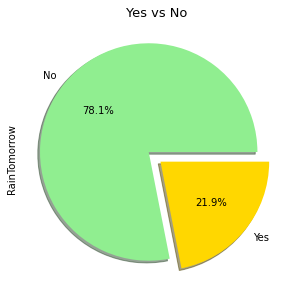

In [29]:
df['RainTomorrow'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%',colors=['lightgreen','gold'],shadow=True,explode=[0.1,0.04])
plt.title('Yes vs No', size=13)
plt.show()

Berdasarkan plot, dapat diketahui bahwa sebanyak 77.9% data pada kolom `RainTomorrow` bernilai **No**, sedangkan sisanya yaitu 22.1% bernilai **Yes**. Data dengan proporsi tidak seimbang dinamakan imbalanced data dan perlu ditangani.

Pengecekan terhadap outlier pada set data dapat dilakukan menggunakan diagnostic plots dengan jenis plot histogram dan boxplot.

In [30]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))
    
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=30)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

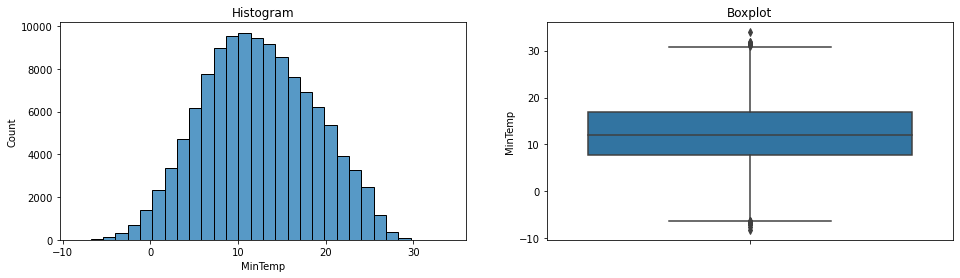

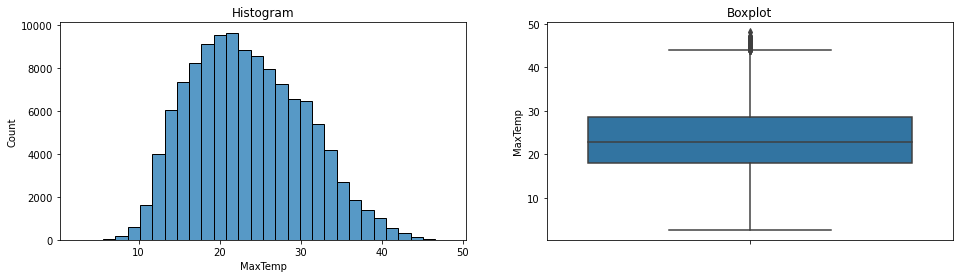

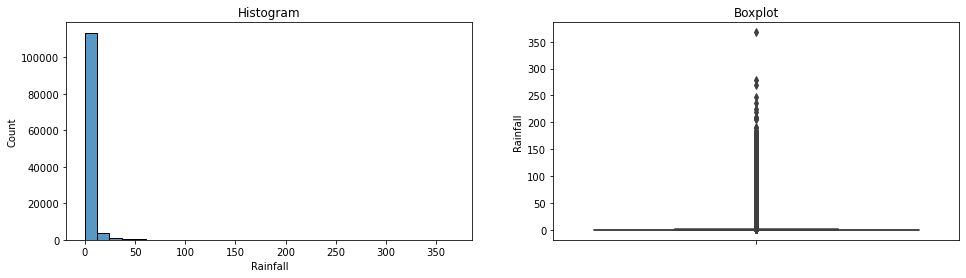

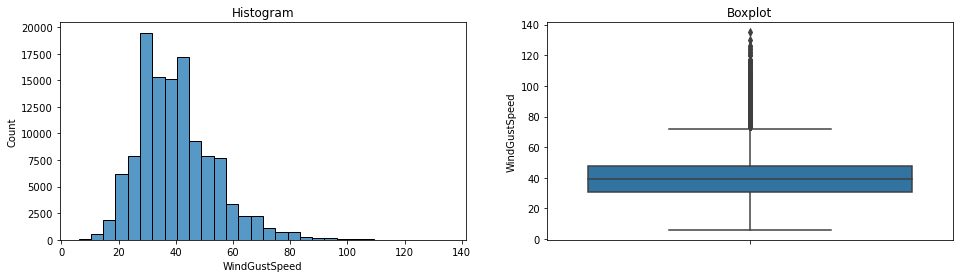

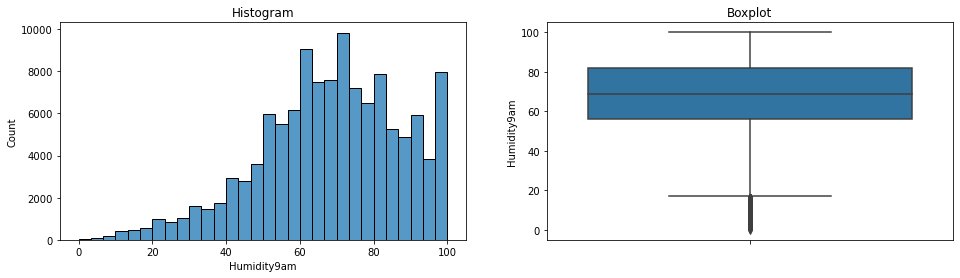

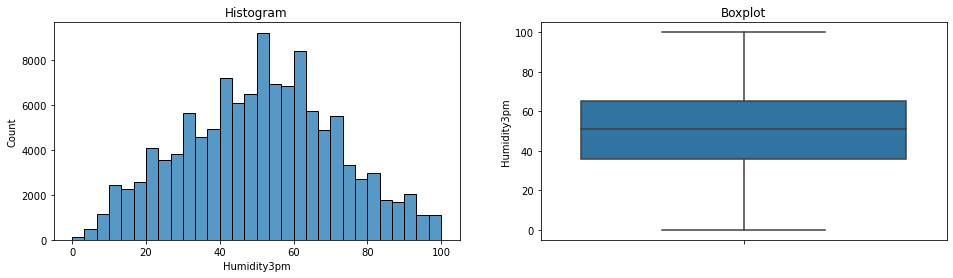

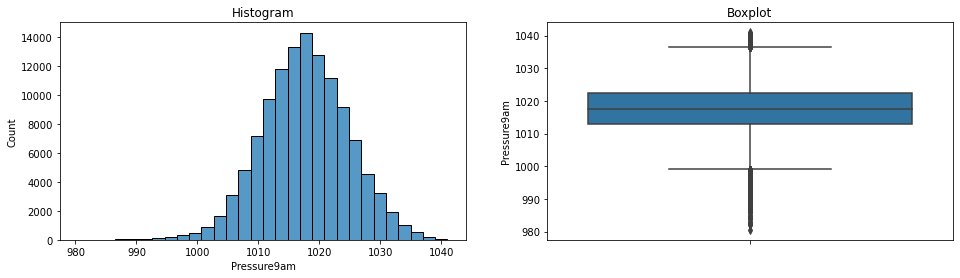

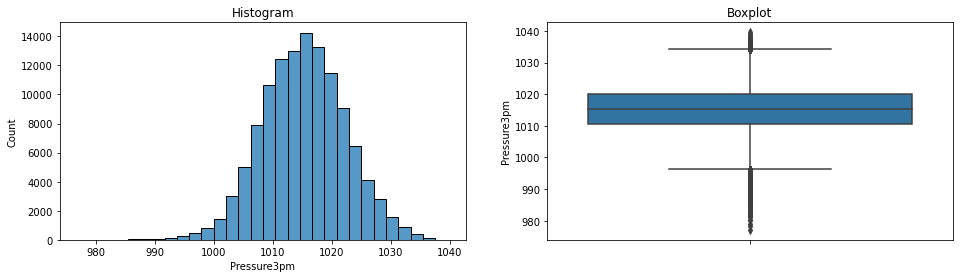

In [31]:
diagnostic_plots(df, 'MinTemp')
diagnostic_plots(df, 'MaxTemp')
diagnostic_plots(df, 'Rainfall')
diagnostic_plots(df, 'WindGustSpeed')
diagnostic_plots(df, 'Humidity9am')
diagnostic_plots(df, 'Humidity3pm')
diagnostic_plots(df, 'Pressure9am')
diagnostic_plots(df, 'Pressure3pm')

Berdasarkan diagnostic plots diatas, dapat diketahui beberapa informasi sebagai berikut:

>*   Distribusi/sebaran data pada kolom **MinTemp** cenderung simetris. Hal ini dapat diketahui melalui garis median pada boxplot yang berada di tengah kotak dan panjang whisker bawah sama dengan panjang whisker bawah. Selain itu, bentuk histogram mengikuti bentuk lonceng. Namun, data pada kolom tersebut memiliki outliers.
>*   Distribusi/sebaran data pada kolom **MaxTemp** cenderung simetris. Hal ini dapat diketahui melalui garis median pada boxplot yang berada di tengah kotak dan panjang whisker bawah sama dengan panjang whisker bawah. Selain itu, bentuk histogram mengikuti bentuk lonceng. Namun, data pada kolom tersebut memiliki outliers.
>*   Distribusi/sebaran data pada kolom **Rainfall** miring ke kanan (positive skewed) ekstrim. Hal ini dapat diketahui melalui garis median yang berada tidak di tengah kotak dan whisker atas lebih panjang daripada whisker bawah. Selain itu, bentuk histogram tidak mengikuti bentuk lonceng. Terdapat banyak outliers pada data.
>*   Distribusi/sebaran data pada kolom **WindGustSpeed** cenderung miring ke kanan (positive skewed). Hal ini dapat diketahui melalui garis median yang berada di tengah kotak dan panjang whisker atas sama dengan panjang whisker bawah. Namun, pada data terdapat banyak outliers di atas nilai maksimum sehingga sebaran data cenderung miring ke kanan. Selain itu, bentuk histogram tidak mengikuti bentuk lonceng.
>*   Distribusi/sebaran data pada kolom **Humidity9am** cenderung miring ke kiri (negative skewed). Hal ini dapat diketahui melalui garis median yang berada di tengah kotak tetapi panjang whisker bawah lebih panjang daripada whisker atas. Pada data terdapat banyak outliers yang letaknya di bawah nilai minimum sehingga menyebabkan sebaran data cenderung miring ke kiri. Selain itu, bentuk histogram tidak mengikuti bentuk lonceng.
>*  Distribusi/sebaran data pada kolom **Humidity3pm** simetris. Hal ini dapat diketahui melalui garis median pada boxplot yang berada di tengah kotak dan panjang whisker bawah sama dengan panjang whisker bawah. Selain itu, bentuk histogram mengikuti bentuk lonceng. Tidak ditemukan nilai outliers pada data.
>*   Distribusi/sebaran data pada kolom **Pressure9am** cenderung miring ke kiri (negative skewed). Hal ini dapat diketahui melalui garis median yang berada di tengah kotak tetapi panjang whisker bawah lebih panjang daripada whisker atas. Pada data terdapat banyak outliers yang letaknya di bawah nilai minimum sehingga menyebabkan sebaran data cenderung miring ke kiri. Selain itu, bentuk histogram tidak mengikuti bentuk lonceng.
>*   Distribusi/sebaran data pada kolom **Pressure3pm** cenderung miring ke kiri (negative skewed). Hal ini dapat diketahui melalui garis median yang berada di tengah kotak tetapi panjang whisker bawah lebih panjang daripada whisker atas. Pada data terdapat banyak outliers yang letaknya di bawah nilai minimum sehingga menyebabkan sebaran data cenderung miring ke kiri. Selain itu, bentuk histogram tidak mengikuti bentuk lonceng.

Jika ingin diketahui tingkat kemiringan data, dapat digunakan fungsi `.skew()`. Nilai koefisien skewness dapat digunakan untuk mengetahui kemiringan distribusi/sebaran data.
1. Koefisien skewness < nol : distribusi negative (mean < median < modus)
2. Koefisien skewness = nol : distribusi simetris (mean = median = modus)
3. Koefisien skewness > nol : distribusi positive (mean > median > modus)

In [32]:
print('Skewness of MinTemp\t\t:', df.MinTemp.skew())
print('Skewness of Max Temp\t\t:', df.MaxTemp.skew())
print('Skewness of Rainfall\t\t:', df.Rainfall.skew())
print('Skewness of WindGustSpeed\t:', df.WindGustSpeed.skew())
print('Skewness of Humidity9am\t\t:', df.Humidity9am.skew())
print('Skewness of Humidity3am\t\t:', df.Humidity3pm.skew())
print('Skewness of Pressure9am\t\t:', df.Pressure9am.skew())
print('Skewness pf Pressure3am\t\t:', df.Pressure3pm.skew())

Skewness of MinTemp		: 0.06237258465761144
Skewness of Max Temp		: 0.31905296927322363
Skewness of Rainfall		: 9.721496673513911
Skewness of WindGustSpeed	: 0.8808927284832081
Skewness of Humidity9am		: -0.4747099160871263
Skewness of Humidity3am		: 0.01739443145721476
Skewness of Pressure9am		: -0.09984086326383623
Skewness pf Pressure3am		: -0.049787423854261985


Berdasarkan hasil tersebut, dapat diperoleh informasi bahwa:

>* Kolom **MinTemp**, **MaxTemp** dan **Humidity3am** cenderung simetris karena koefisien skewness-nya mendekati nilai 0
>* Kolom **Rainfall** miring ke kanan (positive skewed) karena memiliki koefisien skewness lebih besar daripada nilai 0. Kolom **WindGustSpeed** juga cenderung miring ke kanan (positive skewed) karena memiliki koefisien skewed mendekati nilai 1 yang mana lebih besar daripada nilai 0
>* Kolom **Humidity9am**, **Pressure9am**, dan **Pressure3am** cenderung miring ke kiri (negative skewed) karena memiliki koefisien skewness kurang dari nilai 0

Korelasi antar kolom data target terhadap data label dapat dicari menggunakan fungsi `.corr()`. Namun, kolom data target harus di-encode terlebih dahulu karena data target merupakan data kategorik. Pada kolom `RainTomorrow` dilakukan proses encode menggunakan `LabelEncoder` untuk mengubah data kategorik menjadi numerik dengan keterangan:

* No : 0
* Yes : 1

In [33]:
le = LabelEncoder()

df[['RainTomorrow']] = df[['RainTomorrow']].apply(le.fit_transform)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,0
1,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,0
2,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,0
3,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,0
4,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,0


In [34]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainTomorrow
MinTemp,1.000000,0.730855,0.111308,0.196356,-0.246102,0.022174,-0.452415,-0.463049,0.088265
MaxTemp,0.730855,1.000000,-0.069747,0.089228,-0.523961,-0.498623,-0.329705,-0.423383,-0.160101
Rainfall,0.111308,-0.069747,1.000000,0.132212,0.225419,0.256583,-0.170200,-0.130010,0.237933
WindGustSpeed,0.196356,0.089228,0.132212,1.000000,-0.219944,-0.035684,-0.458399,-0.414344,0.235978
Humidity9am,-0.246102,-0.523961,0.225419,-0.219944,1.000000,0.675076,0.141881,0.189343,0.261301
Humidity3pm,0.022174,-0.498623,0.256583,-0.035684,0.675076,1.000000,-0.027535,0.051349,0.452725
Pressure9am,-0.452415,-0.329705,-0.170200,-0.458399,0.141881,-0.027535,1.000000,0.961660,-0.246628
Pressure3pm,-0.463049,-0.423383,-0.130010,-0.414344,0.189343,0.051349,0.961660,1.000000,-0.228353
RainTomorrow,0.088265,-0.160101,0.237933,0.235978,0.261301,0.452725,-0.246628,-0.228353,1.000000


Jika ingin diketahui visualisasi dari korelasi antar kolom, maka dapat digunakan plot jenis heatmap yang didapatkan menggunakan fungsi `sns.heatmap()`.

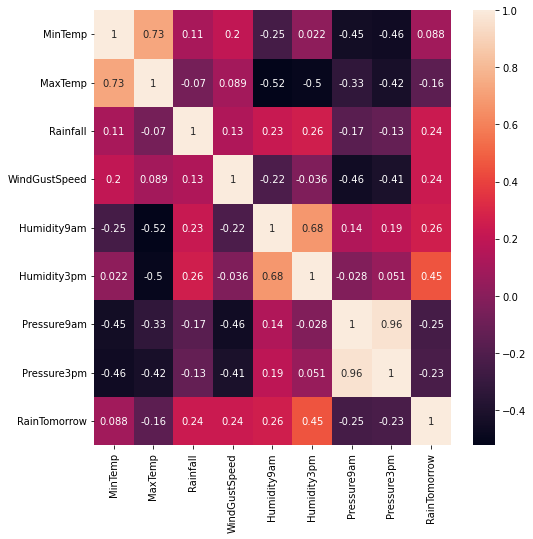

In [90]:
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(df.corr(),annot=True)
plt.show()

Berdasarkan plot, dapat diketahui bahwa korelasi paling tinggi kolom data target dengan kolom data label bernilai 0.45 yaitu kolom `RainTomorrow` dengan kolom `Humidity3pm`.

# Pre-Processing Data

## Encode Data

Proses encode data target telah dilakukan pada proses sebelumnya yaitu EDA untuk mencari nilai korelasi antar kolom.

Dari proses encode data, diperoleh hasil:


*   0: data **No**
*   1: data **Yes**


## Splitting Data

Splitting data dilakukan untuk membagi data menjadi 2 set/bagian yaitu training set dan test set. Pembagian data training dan data testing dilakukan secara acak. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengevaluasi model. Sebelum dilakukan proses splitting data, masing-masing data feature dan data label perlu didefinisikan terlebih dahulu.

* X : data feature
* y : data label

In [36]:
X = df.drop(columns='RainTomorrow',axis=1)
y = df['RainTomorrow']

Setelah data feature dan data label didefinisikan, dilakukan proses standarisasi data menggunakan fungsi `StandardScaler()`.

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Untuk mengatasi adanya imbalanced data, data perlu di-resampling menggunakan metode SMOTE. Metode SMOTE merupakan suatu metode re-sampling untuk menyeimbangkan set data dengan cara  menambah sampel kelas minoritas dengan cara mensintesis data baru berdasarkan metode k-nearest neighbour.

In [38]:
smote = SMOTE(random_state=13)

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.value_counts())
print(' ')
print('Resample dataset shape', y_smote.value_counts())

Original dataset shape 0    93483
1    26219
Name: RainTomorrow, dtype: int64
 
Resample dataset shape 0    93483
1    93483
Name: RainTomorrow, dtype: int64


Proses splitting data dapat menggunakan fungsi `train_test_split()` dengan parameter:

- X : data feature
- y : data label
- test_size : ukuran test data yaitu 30%
- random_state : digunakan agar saat proses running ulang data tidak berubah-ubah

In [39]:
# train 70%, test 30%

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

In [40]:
print('Training dataset\t:', len(X_train))
print('Testing dataset\t\t:', len(X_test))
print('Training\t\t: {0:0.02f}% ada pada dataset'.format((len(X_train)/len(df)) * 100))
print('Test\t\t\t: {0:0.02f}% ada pada dataset'.format((len(X_test)/len(df)) * 100))

Training dataset	: 130876
Testing dataset		: 56090
Training		: 109.33% ada pada dataset
Test			: 46.86% ada pada dataset


# Pendefinisian Model

## Logistic Regression


Logistic Regression atau regresi logistik adalah suatu pendekatan yang digunakan untuk membuat model prediksi. Regresi logistik mirip dengan regresi linear, akan tetapi terdapat perbedaan pada keduanya yaitu pada variabel dependennya yang besifat dikotomus (dua kriteria: ya dan tidak). Perbedaan lainnya adalah pada regresi logistik tidak dibutuhkan asumsi khusus seperti regresi linear.

In [41]:
log_reg = LogisticRegression(multi_class='ovr',random_state=0)

pendifinisian model Logistic Regression dengan memberikan nilai hyperparameter default pada beberapa parameter, yang nantinya akan dilakukan hyperparameter tuning pada pelatihan model

* `multi_class='ovr'` : digunakan ketika regresi yang digunakan adalah regresi logistik biner
* `random state=0` : digunakan untuk mengacak data dan agar saat proses running ulang data tidak berubah-ubah


## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (K-NN) adalah sebuah algoritma Machine Learning yang digunakan untuk melakukan klasifikasi atau regresi pada data dengan cara mencari K-tetangga terdekat dari suatu data yang baru, kemudian memberikan prediksi berdasarkan mayoritas kelas dari tetangga terdekat tersebut.

1. K-NN adalah algoritma Machine Learning yang mudah diimplementasikan dan dipahami.

2. K-NN dapat digunakan untuk masalah klasifikasi dan regresi.

3. K-NN tidak memerlukan asumsi tertentu tentang distribusi data.

4. K-NN memiliki kemampuan untuk menangani data yang tidak linier atau tidak terstruktur.

5. K-NN dapat menghasilkan hasil prediksi yang mudah diinterpretasikan.

6. K-NN dapat secara efektif menangani data yang berdimensi tinggi (high-dimensional data) karena algoritma ini hanya memerlukan perhitungan jarak antara titik data.

Namun, K-NN juga memiliki beberapa kelemahan, seperti sensitif terhadap data outlier dan sensitif terhadap jumlah dan dimensi data. Oleh karena itu, sebelum menggunakan K-NN, penting untuk memahami kondisi data dan menyesuaikan parameter K sesuai dengan kondisi tersebut.

In [42]:
knn = KNeighborsClassifier()

pendifinisian model K-Nearest Neighbors dengan memberikan nilai hyperparameter default, yang nantinya akan dilakukan hyperparameter tuning pada pelatihan model

## Support Vector Machine (SVM)

Support Vector Machine adalah salah satu algoritma Machine Learning yang digunakan untuk mencari hyperplane terbaik dalam ruang N-dimensi yang secara jelas mengklasifikasikan titik data. Hyperplane adalah sebuah fungsi yang digunakan sebagai pemisah antar kelas yang satu dengan yang lain. Pada SVM, kernel adalah metode untuk memetakan data non-linear berdimensi rendah dan mengubahnya ke dalam ruang dimensi yang lebih tinggi. Tujuannya untuk memudahkan pengklasifikasian data dengan menemukan hyperplane yang dapat memisahkan dataset secara linear dengan baik.

In [43]:
# membangun model SVM
model_svc = SVC(kernel='linear', C=100.0)

* `kernel='linear'` digunakan untuk menspesifikasikan tipe kernal yang ingin 
digunakan saat membangun model menggunakan algoritma SVM.
* `C=100.0` parameter ini digunakan ketika data yang dipakai memiliki outlier. Semakin besar nilai C maka akan semakin rendah outliers pada data yang akan digunakan.

## Decision Tree

Decision Tree atau Pohon Keputusan adalah algoritma pembelajaran mesin yang populer dan dapat digunakan untuk masalah klasifikasi maupun regresi. Konsep dasar dari decision tree adalah membagi dataset menjadi beberapa bagian dengan cara menguji nilai-nilai atribut pada setiap simpul di dalam pohon, dan kemudian menentukan cabang mana yang harus diambil berdasarkan hasil pengujian tersebut. Proses pembentukan pohon terus berlanjut hingga mencapai kondisi di mana setiap simpul menghasilkan prediksi yang sama atau mencapai batasan maksimum kedalaman atau ukuran simpul.

Kelebihan dari decision tree antara lain mudah dipahami dan diinterpretasikan, mampu menangani data yang tidak seimbang, dan dapat bekerja dengan baik pada data dengan banyak atribut. Namun, kekurangan dari decision tree adalah cenderung mengalami overfitting pada data training dan sensitif terhadap perubahan data.

In [44]:
dtc = DecisionTreeClassifier()

pendifinisian model Decision Tree Classifier dengan memberikan nilai hyperparameter default, yang nantinya akan dilakukan hyperparameter tuning pada pelatihan model

## Random Forest

Random Forest Classifier merupakan pengembangan dari Decision Tree, di mana model ini membangun banyak pohon keputusan (decision tree) secara acak (random) dan menggabungkan hasil prediksi dari setiap pohon untuk menghasilkan hasil akhir yang lebih akurat dan stabil. Setiap pohon dihasilkan dari subset acak dari data pelatihan dan subset acak dari fitur-fitur yang digunakan untuk membangun setiap pohon. Dalam proses pembuatan prediksi, setiap pohon memberikan suara atau voting terhadap label kelas yang dihasilkan, dan label dengan jumlah suara terbanyak menjadi hasil prediksi akhir.

Keuntungan dari Random Forest Classifier adalah memiliki performa yang baik pada dataset yang besar dan cenderung menghindari overfitting.

In [45]:
rfc = RandomForestClassifier()

pendifinisian model Random Forest Classifier dengan memberikan nilai hyperparameter default, yang nantinya akan dilakukan hyperparameter tuning pada pelatihan model

## Naive Bayes

Naive Bayes adalah sebuah algoritma klasifikasi probabilistik yang didasarkan pada teorema Bayes. Algoritma ini sering digunakan dalam machine learning untuk mengklasifikasikan data yang memiliki banyak fitur atau variabel.

"Naive" dalam Naive Bayes merujuk pada asumsi bahwa setiap fitur atau variabel pada data adalah independen satu sama lain, sehingga kemungkinan munculnya suatu kombinasi fitur dapat dihitung dengan mengalikan kemungkinan munculnya setiap fitur secara individu. Meskipun asumsi ini terkadang tidak sepenuhnya benar dalam dunia nyata, algoritma Naive Bayes tetap menjadi pilihan yang populer dan efektif dalam banyak kasus.

In [46]:
nb = GaussianNB()

pendifinisian model Naive Bayes (Gaussian NB) dengan memberikan nilai hyperparameter default, yang nantinya akan dilakukan hyperparameter tuning pada pelatihan model

# Pelatihan Model

## Logistic Regression

In [47]:
#param_dist = {'C':uniform(loc=0, scale=4),
#              'penalty':['l1','l2'],
#              'solver':['liblinear','saga'],
#              'max_iter':[100,500,1000]}
#
#random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist,
#                                   n_iter=100, cv=5, scoring='accuracy',
#                                   random_state=42)
#random_search.fit(X_train, y_train)
#print(random_search.best_params_)

Dilakukan hyperparameter tuning menggunakan random search untuk Logistic Regression didapatkan parameter terbaik adalah {'C': 0.29617860693636144, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [48]:
log_reg = LogisticRegression(C=0.29617860693636144, max_iter=1000, penalty='l2', solver='liblinear')

Dilakukan pendefinisian ulang model Logistic Regression dengan memasukkan parameter terbaik yang didapatkan dari tuning

In [49]:
model_lr = log_reg.fit(X_train,y_train)
y_pred_lr_train=model_lr.predict(X_train)
y_pred_lr_test=model_lr.predict(X_test)

Melatih model Logistic Regression dengan variabel independen X_train dan target atau variabel dependen y_train, kemudian dilakukan prediksi target dari variabel X_train dan X_test

In [50]:
train=pd.DataFrame(y_train)
train['Predict_Train']=y_pred_lr_train
train

,RainTomorrow,Predict_Train
24580,0,0
51127,0,0
136286,1,1
182468,1,1
158145,1,1
...,...,...
152315,1,1
176963,1,1
117952,0,0
173685,1,1


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_train yang merupakan data untuk membuat prediksi tersebut. Kemudian dibandingkan dengan data real dari y_train, yang menunjukkan hasil dari 10 data yang sama.

In [51]:
test=pd.DataFrame(y_test)
test['Predict_Test']=y_pred_lr_test
test

,RainTomorrow,Predict_Test
161779,1,1
72035,0,0
41735,0,0
145976,1,0
32233,0,0
...,...,...
38517,0,0
12050,0,0
29180,0,0
96948,0,0


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_test. Kemudian dibandingkan dengan data real dari y_test, yang menunjukkan 2 perbedaan hasil dari 10 data yang ditunjukkan.

## K-Nearest Neighbors (KNN)

In [52]:
param_grid = {
    'n_neighbors':[15,16,17,19,20]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'n_neighbors': 15}


Dilakukan hyperparameter tuning menggunakan grid search untuk K-Nearest Neighbors didapatkan parameter terbaik adalah {'n_neighbors': 15}

In [53]:
knn = KNeighborsClassifier(n_neighbors=15)

Dilakukan pendefinisian ulang model K-Nearest Neighbors Classifier dengan memasukkan parameter terbaik yang didapatkan dari tuning

In [54]:
model_knn = knn.fit(X_train,y_train)
y_pred_knn_train=model_knn.predict(X_train)
y_pred_knn_test=model_knn.predict(X_test)

Melatih model K-Nearest Neighbors dengan variabel independen X_train dan target atau variabel dependen y_train, kemudian dilakukan prediksi target dari variabel X_train dan X_test

In [55]:
train=pd.DataFrame(y_train)
train['Predict_Train']=y_pred_knn_train
train

,RainTomorrow,Predict_Train
24580,0,0
51127,0,0
136286,1,1
182468,1,1
158145,1,1
...,...,...
152315,1,0
176963,1,1
117952,0,1
173685,1,1


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_train yang merupakan data untuk membuat prediksi tersebut. Kemudian dibandingkan dengan data real dari y_train, yang menunjukkan terdapat 2 perbedaan hasil dari 10 data yang ditunjukkan.

In [56]:
test=pd.DataFrame(y_test)
test['Predict_Test']=y_pred_knn_test
test

,RainTomorrow,Predict_Test
161779,1,1
72035,0,0
41735,0,0
145976,1,1
32233,0,0
...,...,...
38517,0,1
12050,0,0
29180,0,0
96948,0,0


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_test. Kemudian dibandingkan dengan data real dari y_test, yang menunjukkan 2 perbedaan hasil dari 10 data yang ditunjukkan.

## Support Vector Machine (SVM)

In [57]:
# menampilkan data teratas
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,0
1,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,0
2,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,0
3,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,0
4,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,0


Ditampilkan data teratas untuk melihat kembali dataset secara umum

In [58]:
# mengambil 20000 data sample
df_svm = df.sample(20000)

Diambil sample sebanyak 20000 data karena untuk model SVM lebih baik digunakan data yang berukuran kecil. Digunakan fungsi `sample()` dengan tujuan agar terjadi randomisasi pada data yang akan diambil.

In [59]:
# assign feature dan label
y_svm = df_svm['RainTomorrow']
X_svm = df_svm.drop('RainTomorrow', axis=1)

Kemudian dilakukan pemisahan kolom untuk feature dan label.

In [60]:
#standarisasi feature
scaler = StandardScaler()
X_svm = scaler.fit_transform(X_svm)

Dilakukan standarisasi fitur dengan tujuan untuk normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang terlalu besar.

In [61]:
# train 70%, test 30%

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.3, random_state=0)

Dilakukan splitting tes untuk data SVM ini, dengan ukuran 70% data untuk training dan 30% data untuk testing.

In [62]:
# fitting model
model_svc = model_svc.fit(X_train_svm, y_train_svm)

# menampilkan score model
print('train set score : ', model_svc.score(X_train_svm, y_train_svm))
print('test set score : ', model_svc.score(X_test_svm, y_test_svm))

train set score :  0.8450714285714286
test set score :  0.8428333333333333


Dari hasil score yang ditunjukkan bisa dilihat selisih score untuk penggunaan data training dan testing tidak terlalu jauh yang mana artinya model tidak overfitting.

In [63]:
# predict data
y_pred_svm_train = model_svc.predict(X_train_svm)
y_pred_svm_test = model_svc.predict(X_test_svm)

Kemudian dilakukan prediksi label menggunakan model yang telah dibangun. Proses predict dilakukan dua kali, yaitu menggunakan data training dan menggunakan data testing.

In [64]:
# membandingkan label prediksi dan actual label pada data training
train = pd.DataFrame(y_train_svm)
train['Predict_Train'] = y_pred_svm_train
train

,RainTomorrow,Predict_Train
45759,0,0
8149,0,0
126960,0,0
141310,0,0
1028,0,0
...,...,...
66936,0,0
73279,0,0
2047,0,0
115444,0,0


In [65]:
# membandingkan label prediksi dan actual label pada data testing
test = pd.DataFrame(y_test_svm)
test['Predict_Test'] = y_pred_svm_test
test

,RainTomorrow,Predict_Test
89534,1,0
100122,1,0
79513,0,0
107454,0,0
98029,0,0
...,...,...
42648,0,0
136238,0,0
71812,0,0
18789,0,0


 Setelah itu dibuat masing-masing sebuah data frame untuk data testing dan data training. Di dalamnya memuat data label hasil prediksi dan actual label untuk masing-masing data. Ini bertujuan untuk membandingkan label asli dan label yang diprediksi oleh model. Bisa dilihat dari beberapa data yang ditampilkan di output, model dapat memprediksi label dengan cukup baik.

## Decision Tree

In [66]:
#param_dist = {'max_depth': [3, None],
#              'max_features': randint(1, 4),
#              'min_samples_split': randint(2, 20),
#              'min_samples_leaf': randint(1, 20)}
#
#random_search = RandomizedSearchCV(dtc, param_distributions=param_dist,
#                                   n_iter=100, cv=5, scoring='accuracy',
#                                   random_state=42)
#random_search.fit(X_train, y_train)
#print(random_search.best_params_)

Dilakukan hyperparameter tuning menggunakan random search untuk Decision Tree Classifier didapatkan parameter terbaik adalah {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 9, 'min_samples_split': 6}

In [67]:
dtc = DecisionTreeClassifier(max_depth= None,min_samples_split= 6,min_samples_leaf= 9,max_features= 3)

Dilakukan pendefinisian ulang model Decision Tree Classifier dengan memasukkan parameter terbaik yang didapatkan dari tuning

In [68]:
model_dtc = dtc.fit(X_train,y_train)
y_pred_dtc_train=model_dtc.predict(X_train)
y_pred_dtc_test=model_dtc.predict(X_test)

Melatih model Decision Tree Classifier dengan variabel independen X_train dan target atau variabel dependen y_train, kemudian dilakukan prediksi target dari variabel X_train dan X_test

In [69]:
train=pd.DataFrame(y_train)
train['Predict_Train']=y_pred_dtc_train
train

,RainTomorrow,Predict_Train
24580,0,0
51127,0,0
136286,1,1
182468,1,1
158145,1,1
...,...,...
152315,1,1
176963,1,1
117952,0,0
173685,1,1


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_train yang merupakan data untuk membuat prediksi tersebut. Kemudian dibandingkan dengan data real dari y_train, yang menunjukkan hasil dari 10 data yang sama.

In [70]:
test=pd.DataFrame(y_test)
test['Predict_Test']=y_pred_dtc_test
test

,RainTomorrow,Predict_Test
161779,1,1
72035,0,0
41735,0,0
145976,1,1
32233,0,0
...,...,...
38517,0,0
12050,0,0
29180,0,0
96948,0,0


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_test. Kemudian dibandingkan dengan data real dari y_test, yang menunjukkan 3 perbedaaan hasil dari 10 data yang ditunjukkan.

## Random Forest

In [71]:
#param_dist = {'n_estimators': [80,90,100,110,120],
#              'max_features': ['auto','sqrt','log2'],
#              'max_depth': [10,12,14,16,18],
#              'min_samples_split': [2,5,8,10],
#              'min_samples_leaf': [1,2,4,8]}
#
#random_search = RandomizedSearchCV(rfc, param_distributions=param_dist,
#                                   n_iter=10, cv=5, scoring='accuracy',
#                                   random_state=42)
#random_search.fit(X_train, y_train)
#print(random_search.best_params_)

Dilakukan hyperparameter tuning menggunakan random search untuk Random Forest Classifier didapatkan parameter terbaik adalah {'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 18}

In [72]:
rfc = RandomForestClassifier(n_estimators= 110,max_depth= 18,min_samples_split=2 ,min_samples_leaf= 1,max_features= 'log2' )

Dilakukan pendefinisian ulang model Random Forest Classifier dengan memasukkan parameter terbaik yang didapatkan dari tuning

In [73]:
model_rfc = rfc.fit(X_train,y_train)
y_pred_rfc_train=model_rfc.predict(X_train)
y_pred_rfc_test=model_rfc.predict(X_test)

Melatih model Random Forest Classifier dengan variabel independen X_train dan target atau variabel dependen y_train, kemudian dilakukan prediksi target dari variabel X_train dan X_test

In [74]:
train=pd.DataFrame(y_train)
train['Predict_Train']=y_pred_rfc_train
train

,RainTomorrow,Predict_Train
24580,0,0
51127,0,0
136286,1,1
182468,1,1
158145,1,1
...,...,...
152315,1,1
176963,1,1
117952,0,0
173685,1,1


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_train yang merupakan data untuk membuat prediksi tersebut. Kemudian dibandingkan dengan data real dari y_train, yang menunjukkan hasil dari 10 data sama.

In [75]:
test=pd.DataFrame(y_test)
test['Predict_Test']=y_pred_rfc_test
test

,RainTomorrow,Predict_Test
161779,1,1
72035,0,0
41735,0,0
145976,1,1
32233,0,0
...,...,...
38517,0,0
12050,0,0
29180,0,0
96948,0,0


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_test. Kemudian dibandingkan dengan data real dari y_test, yang menunjukkan 1 perbedaan hasil dari 10 data yang ditunjukkan.

## Naive Bayes

In [76]:
#param_grid={
#    'var_smoothing':[1e-20,1e-15,1e-10]
#}
#
#grid_search = GridSearchCV(nb, param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#print(grid_search.best_params_)

Dilakukan hyperparameter tuning menggunakan grid search untuk Naive Bayes didapatkan parameter terbaik adalah {'var_smoothing': 1e-20}

In [77]:
nb = GaussianNB(var_smoothing=1e-20)

Dilakukan pendefinisian ulang model Naive Bayes dengan memasukkan parameter terbaik yang didapatkan dari tuning

In [78]:
model_nb = nb.fit(X_train,y_train)
y_pred_nb_train=model_nb.predict(X_train)
y_pred_nb_test=model_nb.predict(X_test)

Melatih model Naive Bayes dengan variabel independen X_train dan target atau variabel dependen y_train, kemudian dilakukan prediksi target dari variabel X_train dan X_test

In [79]:
train=pd.DataFrame(y_train)
train['Predict_Train']=y_pred_nb_train
train

,RainTomorrow,Predict_Train
24580,0,0
51127,0,0
136286,1,1
182468,1,1
158145,1,1
...,...,...
152315,1,1
176963,1,1
117952,0,0
173685,1,1


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_train yang merupakan data untuk membuat prediksi tersebut. Kemudian dibandingkan dengan data real dari y_train, yang menunjukkan hasil dari 10 data sama.

In [80]:
test=pd.DataFrame(y_test)
test['Predict_Test']=y_pred_nb_test
test

,RainTomorrow,Predict_Test
161779,1,0
72035,0,0
41735,0,0
145976,1,0
32233,0,0
...,...,...
38517,0,0
12050,0,0
29180,0,0
96948,0,0


Menggunakan dataframe untuk melihat 10 hasil output prediksi dari data X_test. Kemudian dibandingkan dengan data real dari y_test, yang menunjukkan 2 perbedaan hasil dari 10 data yang ditunjukkan.

# Evaluasi Model

## Logistic Regression

Accuracy score data train model Logistic Regression adalah : 0.7836654543231761
Accuracy score data test model Logistic Regression adalah : 0.7813335710465323

Hasil Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     27875
           1       0.79      0.77      0.78     28215

    accuracy                           0.78     56090
   macro avg       0.78      0.78      0.78     56090
weighted avg       0.78      0.78      0.78     56090



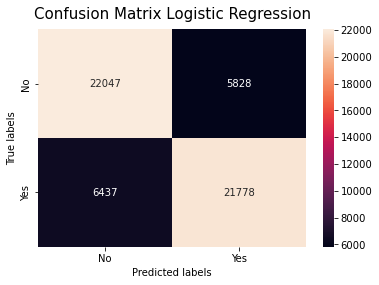

In [81]:
print('Accuracy score data train model Logistic Regression adalah :',accuracy_score(y_train, y_pred_lr_train))
print('Accuracy score data test model Logistic Regression adalah :',accuracy_score(y_test, y_pred_lr_test))

print('\nHasil Classification Report Logistic Regression')
print(classification_report(y_test,y_pred_lr_test)) 

cm_lr = confusion_matrix(y_test,y_pred_lr_test)
ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Logistic Regression', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

> Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Logistic Regression sebesar 0.7813 atau sebesar 78% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting pada model tersebut.

> Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua s
ampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.79 (:0) dan 0.77 (:1) cukup mendekati nilai precision yaitu 0.77 (:0) dan 0.79 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

> Dari confusion matrix diketahui bahwa True negatif (TN) sebanyak 22047, false negatif (FN) sebanyak 5828, false positif (FP) sebanyak 6437, dan true positif (TP) sebanyak 21778.


## K-Nearest Neighbors (KNN)

Accuracy score data train model K-Nearest Neighbors adalah : 0.850369815703414
Accuracy score data test model K-Nearest Neighbors adalah : 0.8239614904617579

Hasil Classification Report K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.86      0.77      0.81     27875
           1       0.79      0.88      0.83     28215

    accuracy                           0.82     56090
   macro avg       0.83      0.82      0.82     56090
weighted avg       0.83      0.82      0.82     56090



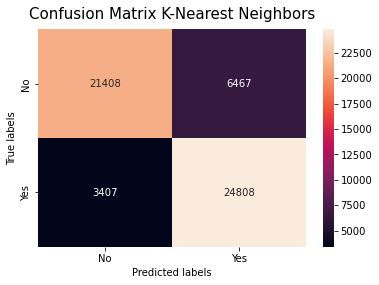

In [82]:
print('Accuracy score data train model K-Nearest Neighbors adalah :',accuracy_score(y_train, y_pred_knn_train))
print('Accuracy score data test model K-Nearest Neighbors adalah :',accuracy_score(y_test, y_pred_knn_test))

print('\nHasil Classification Report K-Nearest Neighbors')
print(classification_report(y_test,y_pred_knn_test)) 

cm_knn = confusion_matrix(y_test,y_pred_knn_test)
ax= plt.subplot()
sns.heatmap(cm_knn, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix K-Nearest Neighbors', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

> Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada data test model K-Nearest Neighbors sebesar 0.8239 atau sebesar 82% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting pada model tersebut.

> Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.77 (:0) dan 0.88 (:1) cukup mendekati nilai precision yaitu 0.86 (:0) dan 0.79 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

> Dari confusion matrix diketahui bahwa True negatif (TN) sebanyak 21408, false negatif (FN) sebanyak 6467, false positif (FP) sebanyak 3407, dan true positif (TP) sebanyak 24808.


## Support Vector Machine (SVM)

Accuracy score data train model Support Vector Machine adalah : 0.8450714285714286
Accuracy score data test model Support Vector Machine adalah : 0.8428333333333333

Hasil Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4672
           1       0.74      0.45      0.56      1328

    accuracy                           0.84      6000
   macro avg       0.80      0.70      0.73      6000
weighted avg       0.83      0.84      0.83      6000



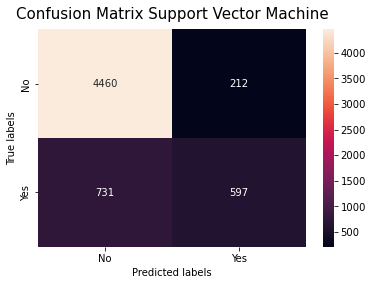

In [83]:
print('Accuracy score data train model Support Vector Machine adalah :',accuracy_score(y_train_svm, y_pred_svm_train))
print('Accuracy score data test model Support Vector Machine adalah :',accuracy_score(y_test_svm, y_pred_svm_test))

print('\nHasil Classification Report Logistic Regression')
print(classification_report(y_test_svm,y_pred_svm_test)) 

cm_svm = confusion_matrix(y_test_svm,y_pred_svm_test)
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Support Vector Machine', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

> Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Support Vector Machine sebesar 0.846 atau sebesar 85% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting pada model tersebut.

> Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.95 (:0) dan 0.46 (:1) cukup mendekati nilai precision yaitu 0.86 (:0) dan 0.74 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

> Dari confusion matrix diketahui bahwa True negatif (TN) sebanyak 4464, false negatif (FN) sebanyak 215, false positif (FP) sebanyak 707, dan true positif (TP) sebanyak 614.

>**Note :
Karena model SVM lebih cocok dipakai untuk jumlah data yang kecil, maka dalam analisis SVM dilakukan penyesuaian terhadap data tersebut**


## Decision Tree

Accuracy score data train model Decision Tree adalah : 0.886167058895443
Accuracy score data test model Decision Tree adalah : 0.813995364592619

Hasil Classification Report Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     27875
           1       0.82      0.80      0.81     28215

    accuracy                           0.81     56090
   macro avg       0.81      0.81      0.81     56090
weighted avg       0.81      0.81      0.81     56090



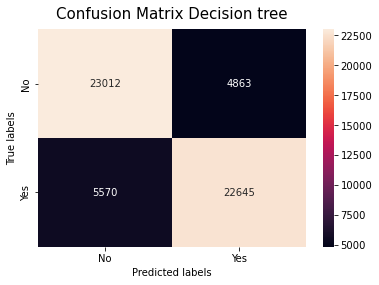

In [84]:
print('Accuracy score data train model Decision Tree adalah :',accuracy_score(y_train, y_pred_dtc_train))
print('Accuracy score data test model Decision Tree adalah :',accuracy_score(y_test, y_pred_dtc_test))

print('\nHasil Classification Report Decision Tree')
print(classification_report(y_test,y_pred_dtc_test)) 

cm_dtc = confusion_matrix(y_test,y_pred_dtc_test)
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Decision tree', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

> Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Decision Tree sebesar 0.8165 atau sebesar 82% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score data training dan data testing cukup besar sehingga dapat disimpulkan terjadi overfitting pada model tersebut.

> Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.83 (:0) dan 0.80 (:1) cukup mendekati nilai precision yaitu 0.81 (:0) dan 0.83 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

> Dari confusion matrix diketahui bahwa True negatif (TN) sebanyak 23089, false negatif (FN) sebanyak 4786, false positif (FP) sebanyak 5503, dan true positif (TP) sebanyak 22712.


## Random Forest

Accuracy score data train model Random Forest adalah : 0.9675035911855496
Accuracy score data test model Random Forest adalah : 0.8756997682296309

Hasil Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     27875
           1       0.88      0.88      0.88     28215

    accuracy                           0.88     56090
   macro avg       0.88      0.88      0.88     56090
weighted avg       0.88      0.88      0.88     56090



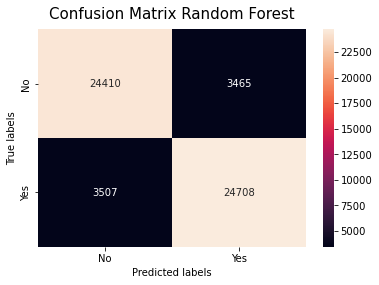

In [85]:
print('Accuracy score data train model Random Forest adalah :',accuracy_score(y_train, y_pred_rfc_train))
print('Accuracy score data test model Random Forest adalah :',accuracy_score(y_test, y_pred_rfc_test))

print('\nHasil Classification Report Random Forest')
print(classification_report(y_test,y_pred_rfc_test)) 

cm_rfc = confusion_matrix(y_test,y_pred_rfc_test)
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forest', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

> Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Random Forest sebesar 0.8770 pada data test atau sebesar 88% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score data training dan data testingnya cukup besar sehingga dapat disimpulkan terjadi sedikit overfitting pada model tersebut.

> Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.88 (:0) dan 0.88 (:1) cukup mendekati nilai precision yaitu 0.88 (:0) dan 0.88 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

> Dari confusion matrix diketahui bahwa True negatif (TN) sebanyak 24454, false negatif (FN) sebanyak 3421, false positif (FP) sebanyak 3473, dan true positif (TP) sebanyak 24742.


## Naive Bayes

Accuracy score data train model Naive Bayes adalah : 0.7561967052782786
Accuracy score data test model Naive Bayes adalah : 0.7551435193439116

Hasil Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.71      0.87      0.78     27875
           1       0.83      0.64      0.73     28215

    accuracy                           0.76     56090
   macro avg       0.77      0.76      0.75     56090
weighted avg       0.77      0.76      0.75     56090



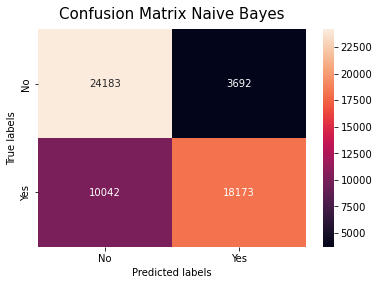

In [86]:
print('Accuracy score data train model Naive Bayes adalah :',accuracy_score(y_train, y_pred_nb_train))
print('Accuracy score data test model Naive Bayes adalah :',accuracy_score(y_test, y_pred_nb_test))

print('\nHasil Classification Report Naive Bayes')
print(classification_report(y_test,y_pred_nb_test)) 

cm_nb = confusion_matrix(y_test,y_pred_nb_test)
ax= plt.subplot()
sns.heatmap(cm_nb, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Naive Bayes', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

> Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Naive Bayes sebesar 0.75515 atau sebesar 76% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting pada model tersebut.

> Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.87 (:0) dan 0.71 (:1) cukup mendekati nilai precision yaitu 0.64 (:0) dan 0.83 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

> Dari confusion matrix diketahui bahwa True negatif (TN) sebanyak 24183, false negatif (FN) sebanyak 3692, false positif (FP) sebanyak 10042, dan true positif (TP) sebanyak 18173.


# Kesimpulan

**Dari hasil analisis diatas dapat ditarik kesimpulan sebagai berikut :**

> Dari hasil analisis feature selection yang pertaama dipilih yaitu MinTemp, MaxTemp, WindGustSpeed, RainTomorrow. Namun, ketika dilakukan analisis akurasi model hanya mendapatkan 80% sehingga untuk mendapatkan hasil yang maksimal dilakukan penambahan feature menjadi MinTemp, MaxTemp, Rainfall, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm dan RainTomorrow karena diketahui beberapa variabel-variabel tersebut  yang paling mempengaruhi terjadinya hujan pada besok (Rain Tomorrow). Dan setelah penambahan feature didapatkan hasil analisis pada nilai akurasi naik menjadi 85%. 

> Dari diagnostic plot diketahui bahwa variabel-variabel yang dipilih sebagai feature berdistribusi normal, namun terdapat juga variabel yang memiliki skew negatif yaitu variabel humidity9am, pressure9m, presure3m. Variabel yang memiliki skew positif yaitu rainfall dan windgustspeed.

> Dari grafik boxplot diketahui bahwa terdapat outliers pada variabel MinTemp, MaxTemp, Rainfall, WindGustSpeed, Humidity9am, Pressure9am, dan Pressure3pm.

> Dari model-model machine learning yang telah dianalisis untuk klasifikasi, diambil kesimpulan bahwa terdapat beberapa model yang sudah baik dalam memprediksi target yaitu Logistic Regression, K-Nearest Neighbors dan Naive Bayes, dan dari ketiga model tersebut dipilih **K-Nearest Neighbors**  merupakan model terbaik untuk memprediksi. Karena nilai True Positif (TN) dan True Negatif (TN) termasuk yang paling besar diantara model-model lain secara berurutan yaitu 24808 dan 21408, nilai akurasi skor pada model tersebut juga cukup besar yaitu 82% sehingga dapat dikatakan model sudah baik dalam memprediksiselain itu selisih skor akurasi antara data train dan data test kecil sehingga tidak terjadi undefitting ataupun overfitting.

> Untuk memprediksi terjadi hujan atau tidaknya yang terjadi di Australia dari data tersebut variabel-variabel yang harus diperhatikan yaitu MinTemp, MaxTemp, Rainfall, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, dan Pressure3pm.